## Week 2:
 
New Topics:

 - Resources for help with coding 
 - Creating a reproducible workflow
 - Merging _pandas_ DataFrames
 - Additional _pandas_ methods 
 

Coding Tasks:

Start a new Jupyter Notebook to complete these tasks. This week, you'll be combining two different datasets.

First, you'll work with a dataset containing the number of primary care physicians per county for each county in the United States. It was obtained from the Area Health Resources File, published by the [Health Resources and Services Administration](https://data.hrsa.gov/topics/health-workforce/ahrf). This data is contained in the file `primary_care_physicians.csv`.

Second, the file `population_by_county.csv` contains the Census Bureau's 2019 population estimates for each US County. It also contains a column `urban`. The `urban` column uses data from the National Bureau of Economic Research to classify each county as either urban or rural. The U.S. Office of Management and Budget designates counties as metropolitan (a core urban area of 50,000 or more population), micropolitan (an urban core of at least 10,000 but less than 50,000 population), or neither. Here, a county is considered "urban" if it is part of a metropolitan or micropolitan area and "rural" if it is not.

 1. First, import the primary care physicians dataset (`primary_care_physicians.csv`) into a data frame named `physicians`. 
 2. Filter `physicians` down to just the counties in Tennessee. Save the filtered dataframe back to `physicians`. Verify that the resulting dataframe has 95 rows.
 3. Look at the distribution of the number of primary care physicians. What do you notice?
 4. Now, import the population by county dataset (`population_by_county.csv`) into a DataFrame named `population`.
 5. Merge the `physicians` DataFrame with the `population` DataFrame. Keep only the values for Tennessee. When you merge, be sure the include both the `population` and `urban` columns in the merged results. Save the result of the merge back to `physicians`.
 6. How many Tennessee counties are considered urban?
 7. The State Health Access Data Assistance Center (SHADAC) (https://www.shadac.org/) classifies counties into three groups based on the number of residents per primary care physician. First, counties with fewer than 1500 residents per primary care physician are considered to have an "adequate" supply. Counties with at least 1500 residents but fewer than 3500 residents per primary care physician are considered to have a "moderately inadequate" supply, and counties with at least 3500 residents per primary care physician are considered to have a "low inadequate" supply. How many counties in Tennessee are in each group? 
 8. Does there appear to be any detectable relationship between whether a county is urban or rural and its supply of primary care physicians?

In [1]:
import pandas as pd

In [3]:
physicians = pd.read_csv('../data/primary_care_physicians.csv')

In [5]:
physicians = physicians.loc[physicians.state == 'Tennessee']
physicians.shape

(95, 4)

In [ ]:
physicians.primary_care_physicians.describe()

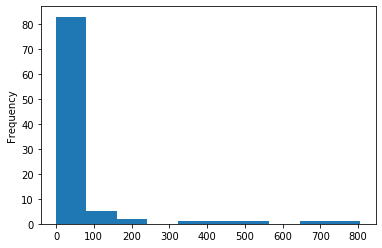

In [9]:
physicians.primary_care_physicians.plot.hist()

In [11]:
population = pd.read_csv('../data/population_by_county.csv')
population.head()

,FIPS,population,county,state,urban
0,17051,21565,Fayette County,ILLINOIS,Rural
1,17107,29003,Logan County,ILLINOIS,Rural
2,17165,23994,Saline County,ILLINOIS,Rural
3,17097,701473,Lake County,ILLINOIS,Urban
4,17127,14219,Massac County,ILLINOIS,Rural


In [16]:
physicians

,FIPS,state,county,primary_care_physicians
2432,47001,Tennessee,Anderson,39.0
2433,47003,Tennessee,Bedford,15.0
2434,47005,Tennessee,Benton,3.0
2435,47007,Tennessee,Bledsoe,1.0
2436,47009,Tennessee,Blount,90.0
...,...,...,...,...
2522,47181,Tennessee,Wayne,5.0
2523,47183,Tennessee,Weakley,18.0
2524,47185,Tennessee,White,9.0
2525,47187,Tennessee,Williamson,338.0


In [18]:
physicians = pd.merge(left = physicians, right = population[['FIPS','population','urban']], left_on='FIPS', right_on = 'FIPS')

In [23]:
physicians['urban'].value_counts()

Rural    57
Urban    38
Name: urban, dtype: int64

The State Health Access Data Assistance Center (SHADAC) (https://www.shadac.org/) classifies counties into three groups based on the number of residents per primary care physician. First, counties with fewer than 1500 residents per primary care physician are considered to have an "adequate" supply. Counties with at least 1500 residents but fewer than 3500 residents per primary care physician are considered to have a "moderately inadequate" supply, and counties with at least 3500 residents per primary care physician are considered to have a "low inadequate" supply. How many counties in Tennessee are in each group?

In [35]:
physicians.loc[ 
               physicians.population/physicians.primary_care_physicians < 3500]

,FIPS,state,county,primary_care_physicians,population,urban,supply
0,47001,Tennessee,Anderson,39.0,76061,Urban,NaN
1,47003,Tennessee,Bedford,15.0,48292,Rural,NaN
4,47009,Tennessee,Blount,90.0,129927,Urban,adequate
5,47011,Tennessee,Bradley,55.0,105749,Urban,NaN
6,47013,Tennessee,Campbell,19.0,39797,Rural,NaN
...,...,...,...,...,...,...,...
90,47181,Tennessee,Wayne,5.0,16693,Rural,NaN
91,47183,Tennessee,Weakley,18.0,33510,Rural,NaN
92,47185,Tennessee,White,9.0,26800,Rural,NaN
93,47187,Tennessee,Williamson,338.0,225389,Urban,adequate


In [37]:
physicians.loc[physicians.population/physicians.primary_care_physicians < 1500,'supply'] = 'adequate'
physicians.loc[(physicians.population/physicians.primary_care_physicians > 1500) &
               (physicians.population/physicians.primary_care_physicians < 3500),'supply'] = 'moderately adequate'
physicians.loc[physicians.population/physicians.primary_care_physicians > 3500,'supply'] = 'inadequate'

In [38]:
physicians

,FIPS,state,county,primary_care_physicians,population,urban,supply
0,47001,Tennessee,Anderson,39.0,76061,Urban,moderately adequate
1,47003,Tennessee,Bedford,15.0,48292,Rural,moderately adequate
2,47005,Tennessee,Benton,3.0,16140,Rural,inadequate
3,47007,Tennessee,Bledsoe,1.0,14836,Rural,inadequate
4,47009,Tennessee,Blount,90.0,129927,Urban,adequate
...,...,...,...,...,...,...,...
90,47181,Tennessee,Wayne,5.0,16693,Rural,moderately adequate
91,47183,Tennessee,Weakley,18.0,33510,Rural,moderately adequate
92,47185,Tennessee,White,9.0,26800,Rural,moderately adequate
93,47187,Tennessee,Williamson,338.0,225389,Urban,adequate


In [39]:
physicians.supply.value_counts()

moderately adequate    50
inadequate             31
adequate               14
Name: supply, dtype: int64

In [42]:
physicians.groupby('urban').supply.value_counts()

urban  supply             
Rural  moderately adequate    31
       inadequate             21
       adequate                5
Urban  moderately adequate    19
       inadequate             10
       adequate                9
Name: supply, dtype: int64